In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


C:\Users\AKSHAY\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
A=pd.read_excel('decisiontreetest.xlsx')
A.head()

FileNotFoundError: [Errno 2] No such file or directory: 'decisiontreetest.xlsx'

In [ ]:
A

In [ ]:
plt.scatter(A['X1'],A['X2'],c=A['class'],cmap='Set1')

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydotplus

In [8]:
mycols=['X1','X2']
cl_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=2)
cl_tree=cl_tree.fit(A[['X1','X2']],A['class'])
pred=cl_tree.predict(A[['X1','X2']])
print (pd.crosstab(A['class'],pred))

col_0  0  1
class      
0      5  1
1      1  4


In [10]:
dot_data = StringIO()

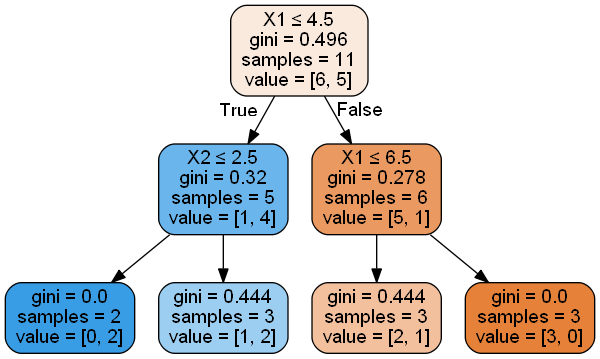

In [11]:
export_graphviz(cl_tree, out_file=dot_data, feature_names=mycols, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [12]:
1-(5/11)**2-(6/11)**2

0.4958677685950414

In [16]:
1-(1/2)**2-(1/2)**2

0.5

In [17]:
1-(3/7)**2-(4/7)**2

0.489795918367347

In [18]:
8/25

0.32

In [19]:
1-(5/6)**2-(1/6)**2

0.2777777777777777

In [20]:
((0.32*5)+(6*0.277))/11

0.2965454545454546

# PRIMA DIABETES

In [21]:
B=pd.read_csv('prima-indians-diabetes.csv',header=None)
B.columns=['Preg','Glu','Bp','Sft','Ins','Bmi','Dpf','Age','Class']

In [22]:
B.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
x=B[['Preg','Glu','Bp','Sft','Ins','Bmi','Dpf','Age']]
y=B['Class']

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [75]:
temp=[]
for i in range(1,20):
    bl_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=i)
    bl_tree=bl_tree.fit(xtrain,ytrain)
    pred_diab=bl_tree.predict(xtest)
    ct=pd.crosstab(ytest,pred_diab)
    temp.append(((ct.iloc[0,0]+ct.iloc[1,1])/(ct.iloc[0,0]+ct.iloc[0,1]+ct.iloc[1,0]+ct.iloc[1,1])))


In [76]:
temp

[0.7532467532467533,
 0.7575757575757576,
 0.7575757575757576,
 0.7619047619047619,
 0.7662337662337663,
 0.7316017316017316,
 0.7272727272727273,
 0.7272727272727273,
 0.7056277056277056,
 0.6926406926406926,
 0.683982683982684,
 0.6883116883116883,
 0.6926406926406926,
 0.6926406926406926,
 0.683982683982684,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883]

In [65]:
temp1=[]
for i in range(1,20):
    bl_tree1=tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=i)
    bl_tree1=bl_tree1.fit(xtrain,ytrain)
    pred_diab1=bl_tree1.predict(xtrain)
    ct1=pd.crosstab(ytrain,pred_diab1)
    temp1.append(((ct1.iloc[0,0]+ct1.iloc[1,1])/(ct1.iloc[0,0]+ct1.iloc[0,1]+ct1.iloc[1,0]+ct1.iloc[1,1])))

In [77]:
temp1

[0.7299813780260708,
 0.7635009310986964,
 0.7635009310986964,
 0.8044692737430168,
 0.8268156424581006,
 0.8715083798882681,
 0.8994413407821229,
 0.925512104283054,
 0.9459962756052142,
 0.9739292364990689,
 0.9869646182495344,
 0.994413407821229,
 0.9962756052141527,
 0.9962756052141527,
 0.9981378026070763,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0.5,1,'Accuracy vs Maximum Depth')

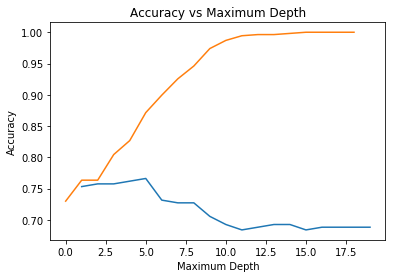

In [78]:
plt.plot(range(1,20),temp,temp1)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Maximum Depth')

# FAIR PAY DATA

In [79]:
c=pd.read_csv('fair_pay_data.csv')
c.head()

,employee_id,department,salary,new_hire,job_level
0,1,Sales,103263.63550,No,Salaried
1,2,Engineering,80708.64104,No,Hourly
2,4,Engineering,60737.04786,Yes,Hourly
3,5,Engineering,99116.32328,Yes,Salaried
4,7,Engineering,51021.64386,No,Hourly


In [82]:
c['job_level'].value_counts()

Hourly      1039
Salaried     326
Manager      105
Name: job_level, dtype: int64

In [84]:
c['job_level']=c['job_level'].replace({1: 'Salaried',2: 'Hourly',3: 'Manager'})

In [87]:
c['department'].value_counts()

Engineering    961
Sales          446
Finance         63
Name: department, dtype: int64

In [88]:
c['department']=c['department'].replace({1: 'Engineering',2: 'Sales',3: 'Finance'})

In [94]:
c['new_hire'].value_counts()

No     1072
Yes     398
Name: new_hire, dtype: int64

In [95]:
c['new_hire']=c['new_hire'].replace({1: 'No', 2: 'Yes'})

In [96]:
c= pd.get_dummies(c, columns=['new_hire'])
c.head()

,employee_id,salary,job_level_Hourly,job_level_Manager,job_level_Salaried,department_Engineering,department_Finance,department_Sales,new_hire_No,new_hire_Yes
0,1,103263.63550,0,0,1,0,0,1,1,0
1,2,80708.64104,1,0,0,1,0,0,1,0
2,4,60737.04786,1,0,0,1,0,0,0,1
3,5,99116.32328,0,0,1,1,0,0,0,1
4,7,51021.64386,1,0,0,1,0,0,1,0


In [98]:
x=c[['job_level_Hourly','job_level_Manager', 'job_level_Salaried', 'department_Engineering', 'department_Finance', 'department_Sales','new_hire_No','new_hire_Yes']]
y=c['salary']

In [106]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [120]:
RMSE=[]
MAPE=[]
for i in range(1,20):
    c_tree=tree.DecisionTreeRegressor(random_state=1,max_depth=i)
    c_tree=c_tree.fit(xtrain,ytrain)
    pred_fair=c_tree.predict(xtest)
    RMSE.append(np.sqrt(np.sum(((ytest-pred_fair)**2))/len(ytest)))
    MAPE.append(np.mean(np.abs((ytest-pred_fair)/ytest)))

In [115]:
RMSE #Root mean square error

[10946.418636397122,
 8804.334630836478,
 8815.132984303744,
 8822.744473245319,
 8837.062581662336,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332,
 8837.062581662332]

In [121]:
MAPE #Mean Absolute Percentage Error

[0.12141970558177385,
 0.10724034373126289,
 0.10737466969884527,
 0.10735648303831362,
 0.1075517840401925,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253,
 0.10755178404019253]

# RANDOM FOREST

In [124]:
x1=B[['Preg','Glu','Bp','Sft','Ins','Bmi','Dpf','Age']]
y1=B['Class']

In [125]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.3,random_state=1)

In [135]:
temp_rfc=[]
for i in range(1,6):
    rfc_tree=RandomForestClassifier(n_estimators=500,max_features=i)
    rfc_tree=rfc_tree.fit(x1train,y1train)
    pred_rfc=rfc_tree.predict(x1test)
    ct=pd.crosstab(y1test,pred_rfc)
    temp_rfc.append(((ct.iloc[0,0]+ct.iloc[1,1])/(ct.iloc[0,0]+ct.iloc[0,1]+ct.iloc[1,0]+ct.iloc[1,1])))

In [136]:
temp_rfc #Accuracy for various max feature values ranging from 1 to 6

[0.7922077922077922,
 0.7965367965367965,
 0.8008658008658008,
 0.8008658008658008,
 0.7922077922077922]

CODE TO FIND OUT IMPORTANT FEATURES (COLUMNS) FOR A DATA

In [138]:
features = B.columns
importances = rfc_tree.feature_importances_
indices = np.argsort(importances)

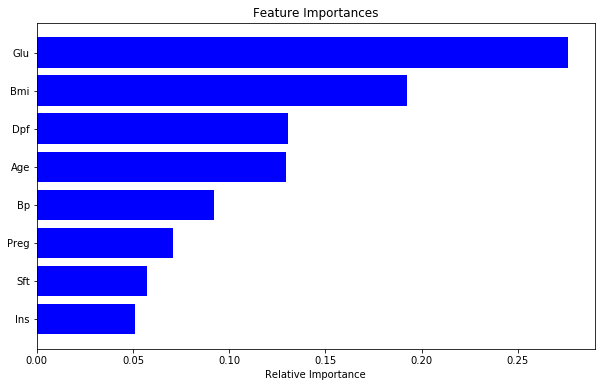

In [140]:
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color = 'b', align='center')
plt.yticks(range(len(indices)),features[indices])
plt.xlabel('Relative Importance')
plt.show()